![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. XX(XX):XX-XX.

<h1><center>Part 2: Standard and Multi-RPYS Analysis</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). The code in this notebook is current as of *metaknowledge* version XXX.

In [1]:
%matplotlib inline

import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

sns.set_style(style="white") # change the default background plot colour
sns.set(font_scale=.7)

plt.rc("savefig", dpi=300) # improve default resolution of graphics

import os
os.chdir('.') # .. is a special symbol for the directory above the current one

In [2]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)

## Standard Reference Publication Year Spectroscopy (RPYS)


In [3]:
stan_results = RC.rpys(1900,2015) # takes a min and max year

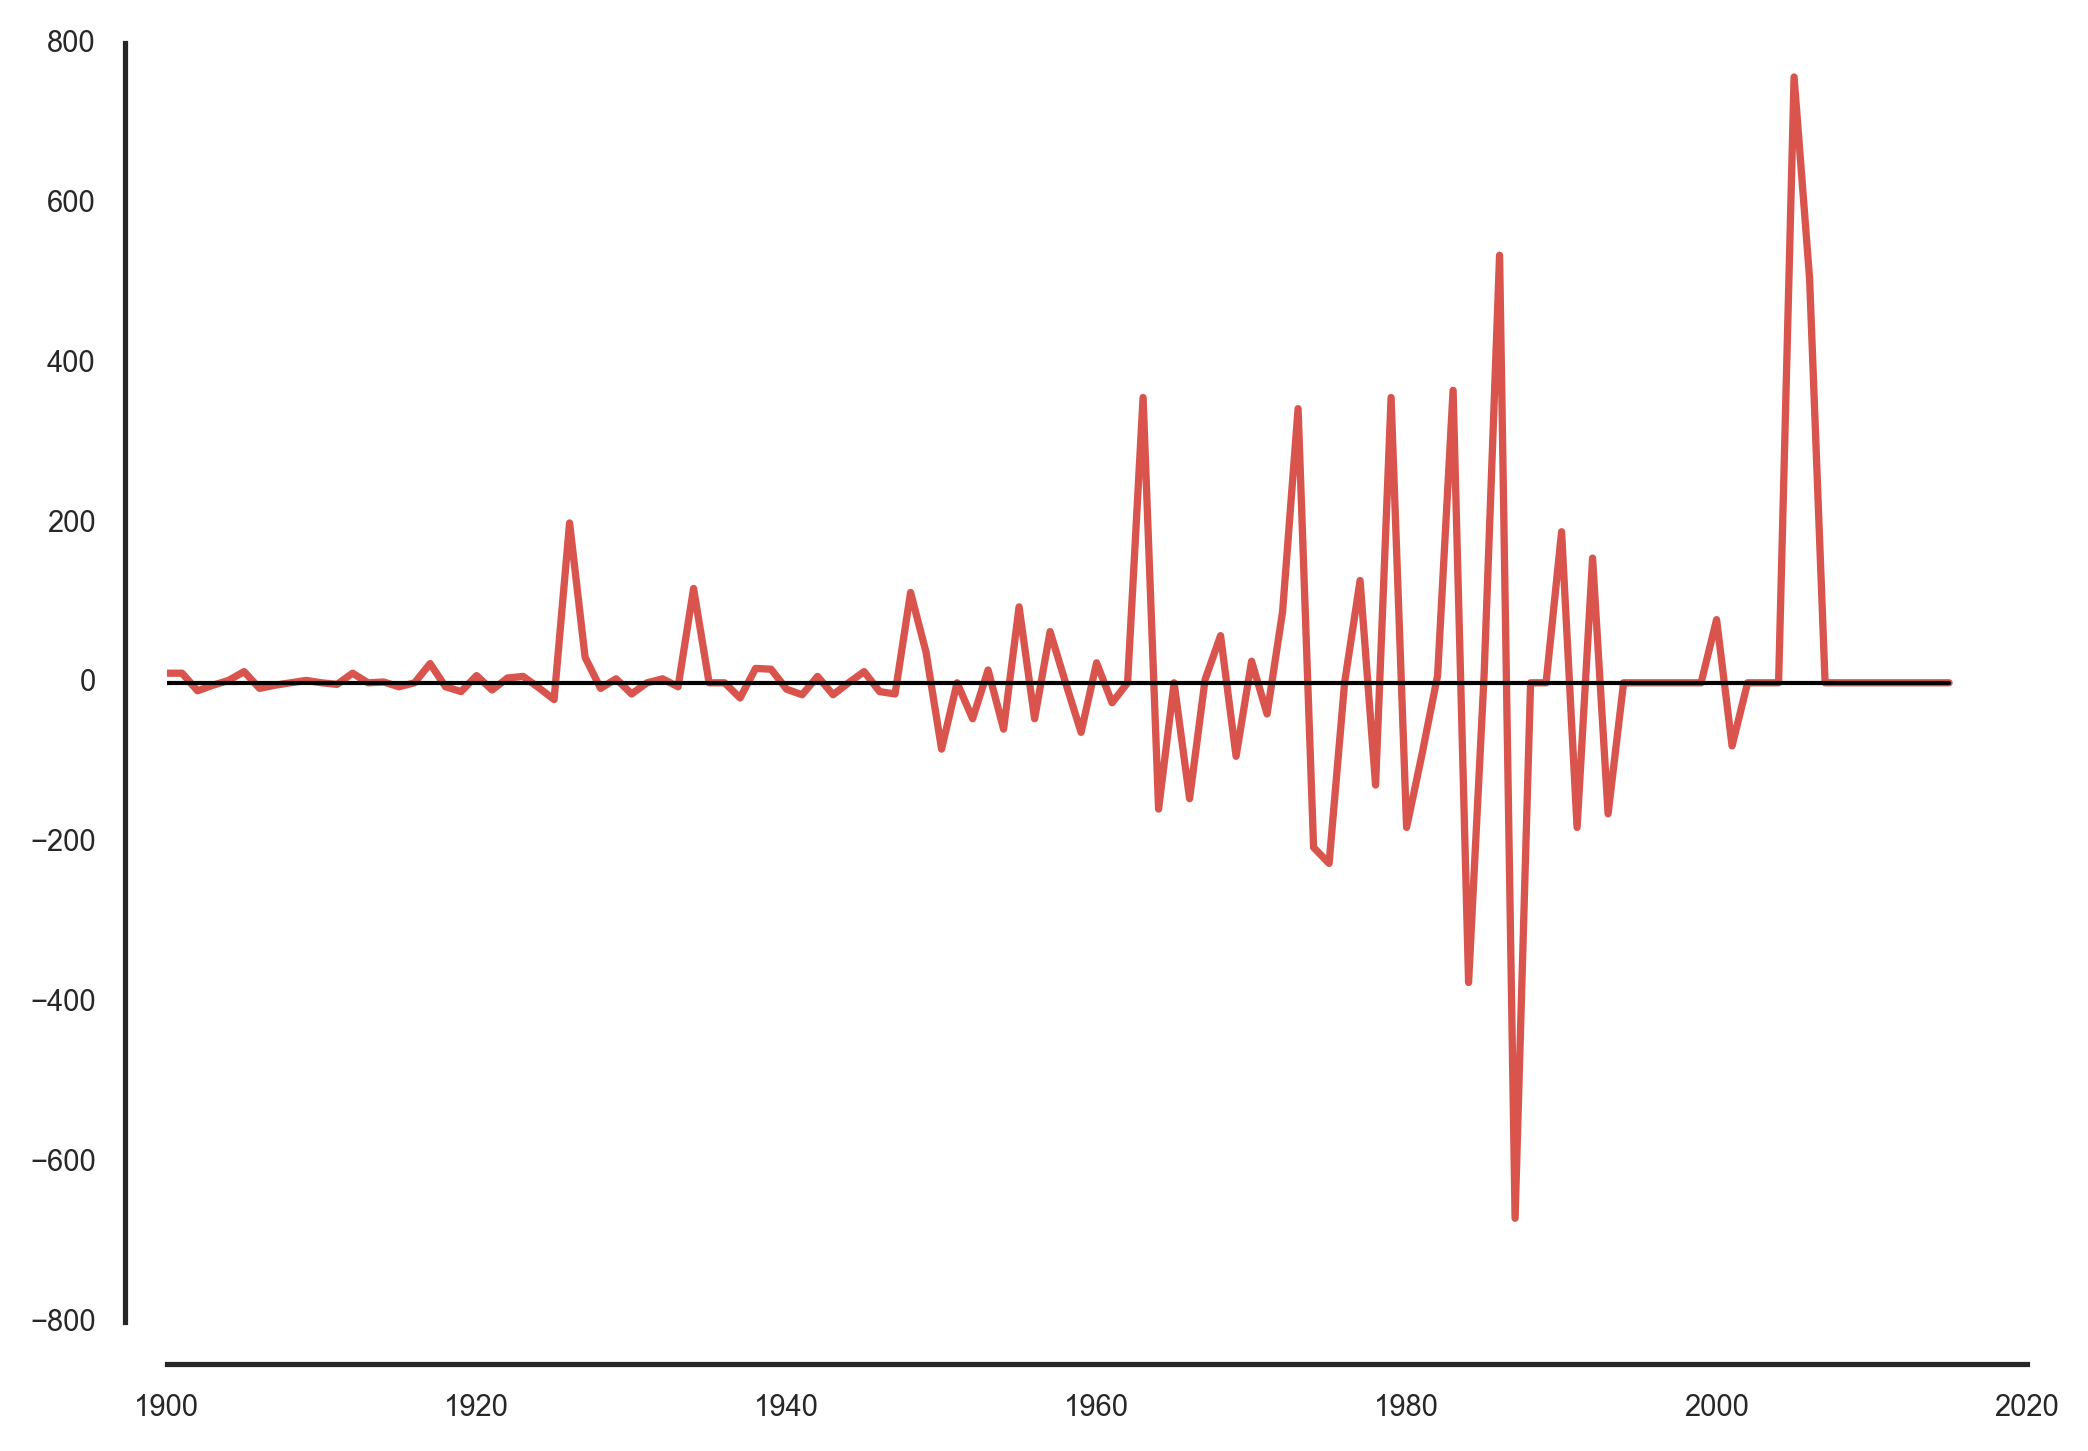

In [4]:
dev_line_color = sns.xkcd_rgb["pale red"]

with sns.axes_style("white"):
    plt.plot(stan_results['year'],stan_results['abs-deviation'], color = dev_line_color)
    plt.plot([1900,2015], [0, 0], linewidth=1, color = "black") # add a line at 0 to emphasize deviations.
    sns.despine(offset=10, trim=True)
plt.savefig("figures/rpys_standard.pdf")

Once we identify a year (or years) that we want to inspect further, we can use the `getCitations` method to see the published records.

In [5]:
year_results = RC.getCitations('year', 1963, pandasFriendly=True)
pandas.DataFrame(year_results).sort_values(['num-cites'], ascending=False)

,author,citeString,fraction-cites-overall,fraction-cites-year,journal,num-cites,year
83,De Solla Price Derek J,"De Solla Price Derek J., 1963, LITTLE SCI BIG SCI",0.187050,0.187050,LITTLE SCI BIG SCI,156,1963
55,Kessler Mm,"KESSLER MM, 1963, AM DOC, V14, P10, DOI 10.100...",0.128297,0.128297,AM DOC,107,1963
163,Price D J D S,"Price D. J. d. S, 1963, LITTLE SCI BIG SCI",0.100719,0.100719,LITTLE SCI BIG SCI,84,1963
224,Garfield E,"GARFIELD E, 1963, AM DOC, V14, P195, DOI 10.10...",0.083933,0.083933,AM DOC,70,1963
26,Price Djd,"PRICE DJD, 1963, LITTLE SCI BIG SCI, P89",0.021583,0.021583,LITTLE SCI BIG SCI,18,1963
160,Abramson N,"Abramson N., 1963, INFORM THEORY CODING",0.020384,0.020384,INFORM THEORY CODING,17,1963
5,Ward Jh,"WARD JH, 1963, J AM STAT ASSOC, V58, P236, DOI...",0.014388,0.014388,J AM STAT ASSOC,12,1963
3,Weinberg Am,"WEINBERG AM, 1963, MINERVA, V1, P159, DOI 10.1...",0.013189,0.013189,MINERVA,11,1963
110,Price Dd,"PRICE DD, 1963, LITTLE SCI BIG SCI, P40",0.010791,0.010791,LITTLE SCI BIG SCI,9,1963
245,Kelly G A,"Kelly G. A., 1963, THEORY PERSONALITY P",0.010791,0.010791,THEORY PERSONALITY P,9,1963


### Multi RPYS

In [9]:
minYear = 1950
maxYear = 2015

years = range(minYear, maxYear+1)

dictionary = {'CPY': [],
             "abs-deviation": [],
             "num-cites": [],
             "rank": [],
             "RPY": []}
for i in years:
    try:
        RCyear = RC.yearSplit(i, i)
        if len(RCyear) > 0:
            rpys = RCyear.rpys(minYear=minYear, maxYear=i)
            length = len(rpys['year'])
            rpys['CPY'] = [i]*length

            dictionary['CPY'] += rpys['CPY']
            dictionary['abs-deviation'] += rpys['abs-deviation']
            dictionary['num-cites'] += rpys['count']
            dictionary['rank'] += rpys['rank']
            dictionary['RPY'] += rpys['year']
    except:
        pass

multi_rpys = pandas.DataFrame.from_dict(dictionary)
multi_rpys.to_csv("generated_datasets/multi_rpys.csv")

In [10]:
hm_table = multi_rpys.pivot('CPY', 'RPY', 'rank')
hm_table

RPY,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
CPY,,,,,,,,,,,,,,,,,,,,,
1978,5,0,0,6,11,12,25,7,26,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,11,8,22,10,12,13,23,3,24,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,23,10,24,11,12,25,8,13,14,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,10,0,11,7,0,12,13,14,24,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,11,12,0,4,24,13,27,1,9,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,8,0,0,11,0,12,15,9,16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,25,10,27,15,16,11,17,8,18,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,13,14,30,15,27,16,17,18,9,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0,9,0,0,18,19,20,21,0,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


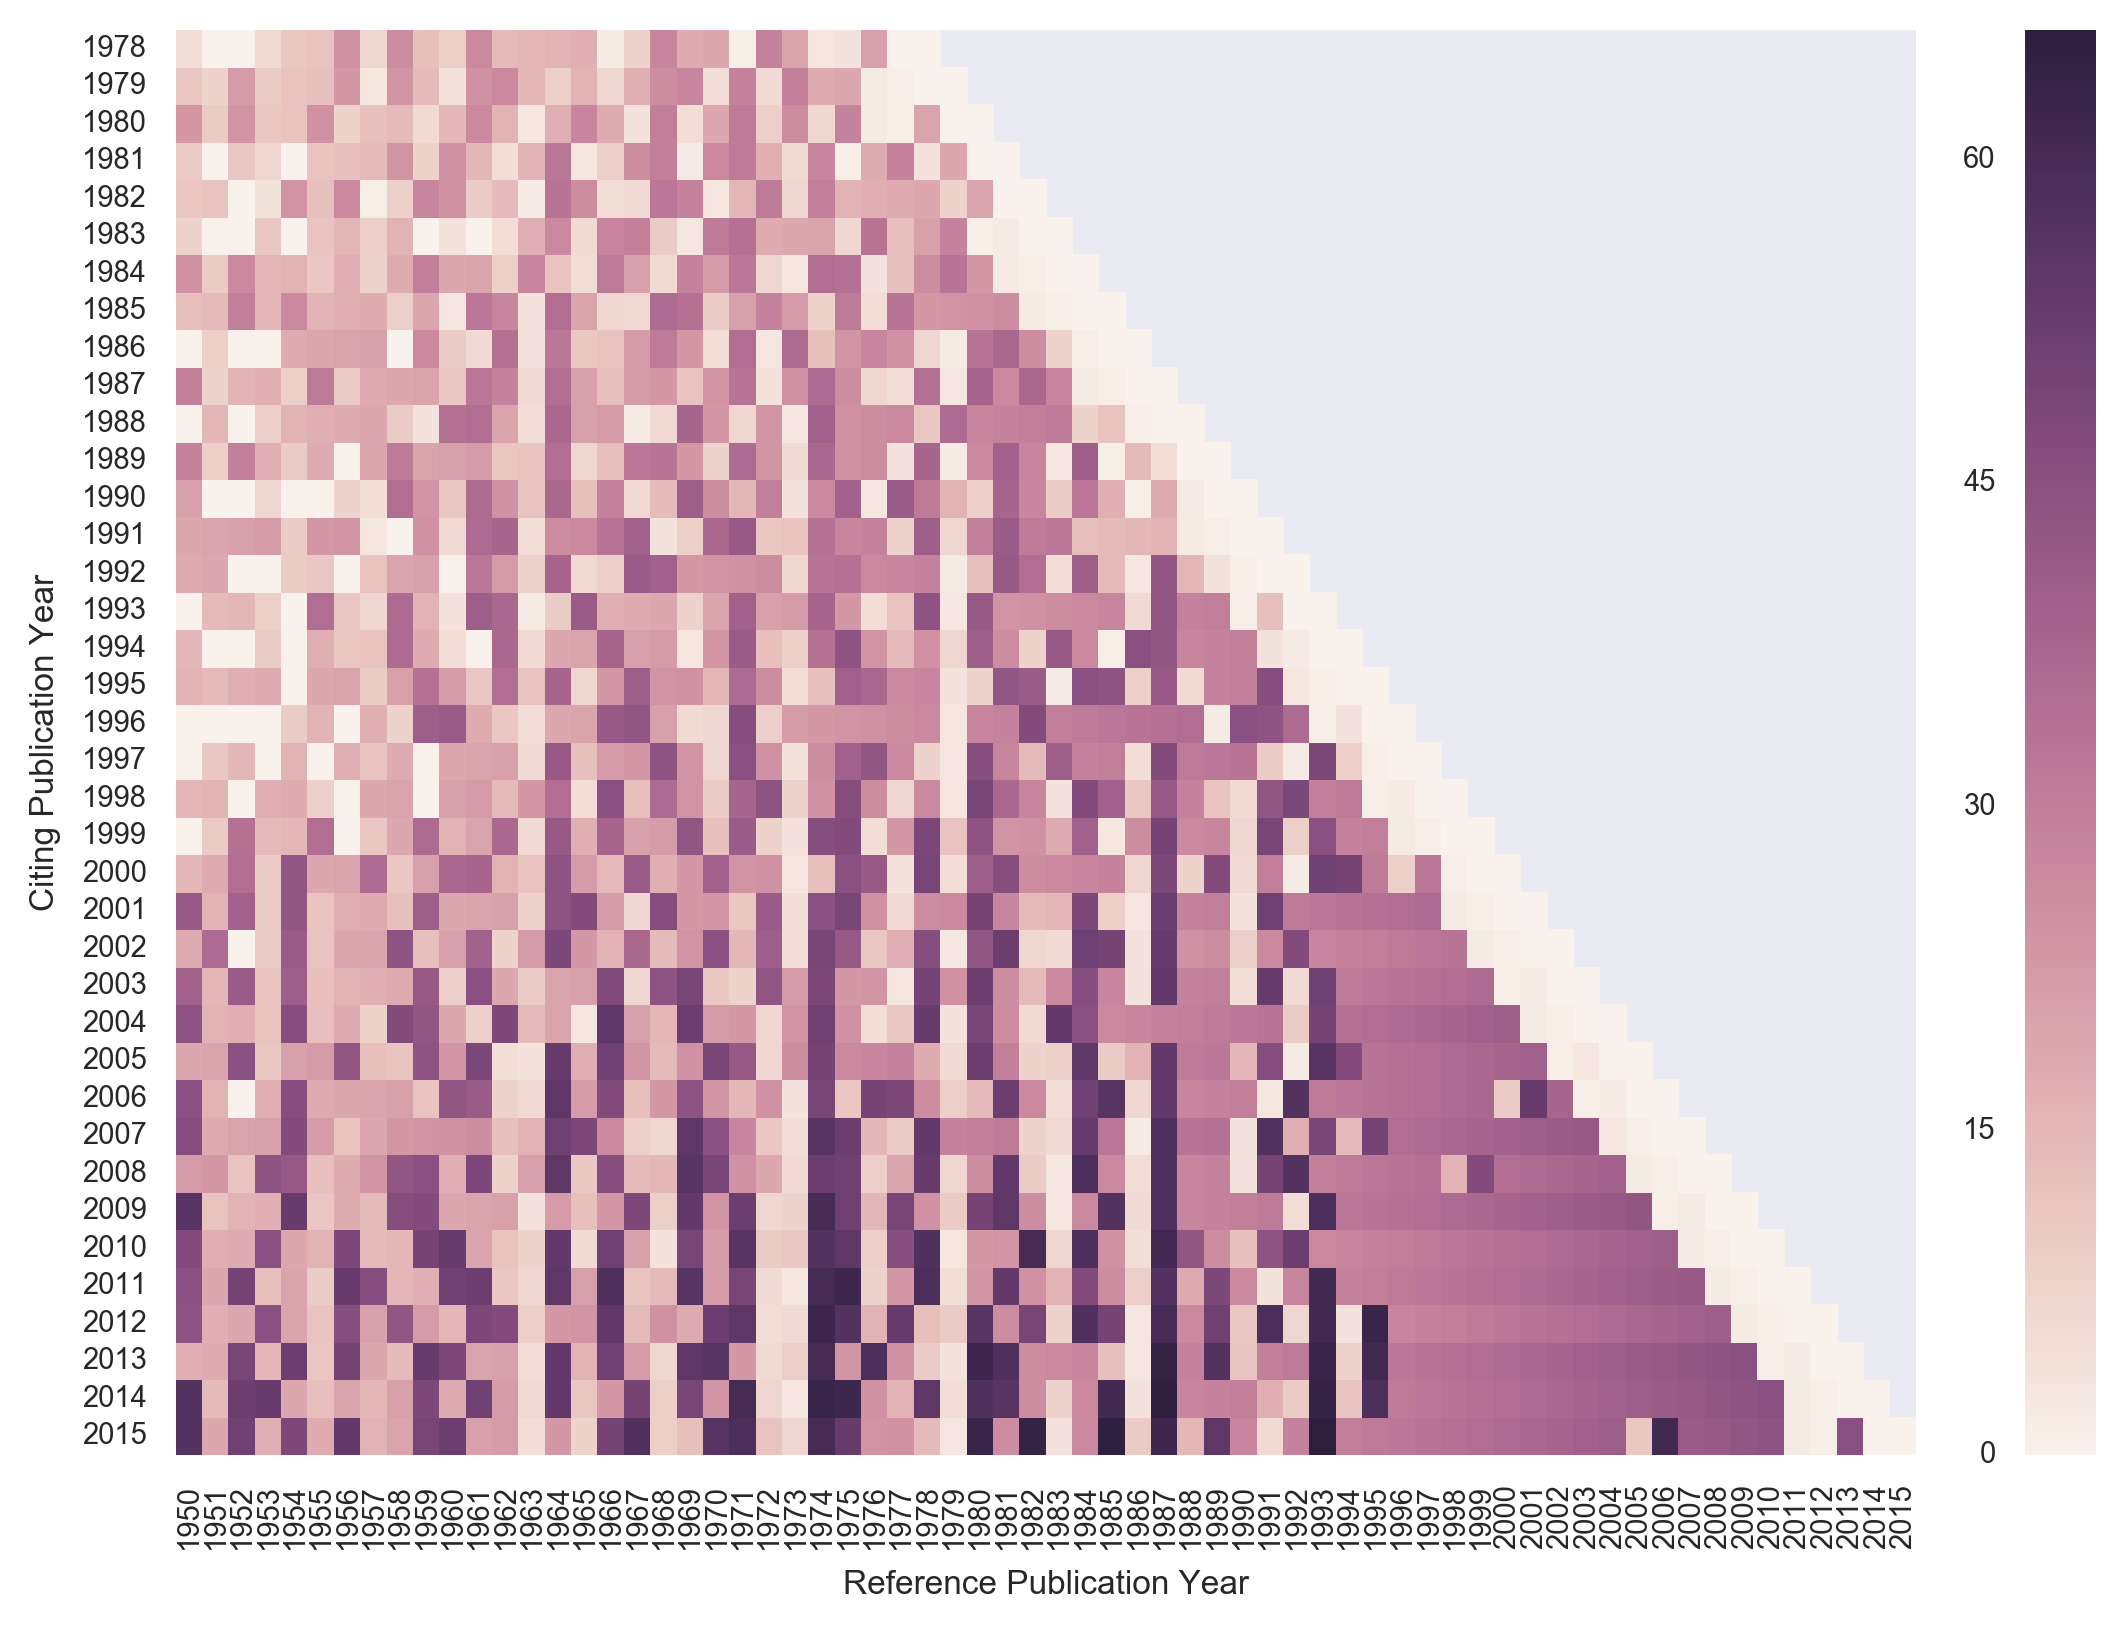

In [15]:
sns.heatmap(hm_table, square = False)
plt.xlabel('Reference Publication Year', size = 8)
plt.ylabel('Citing Publication Year', size = 8)
sns.despine()
plt.tight_layout()
plt.savefig("figures/rpys_multi.pdf")

# Interactive Standard and Multi RPYS Graphs with *mkD3*

### Standard RPYS

In [12]:
# Create the RPYS File
standard_rpys = pandas.DataFrame.from_dict(stan_results)
standard_rpys.to_csv("generated_datasets/standard_rpys.csv")

# Create the Citation File
cits = RC.getCitations()
citations = pandas.DataFrame.from_dict(cits)
citations.to_csv("generated_datasets/standard_citation.csv")

# Create Link to Graphs
from IPython.display import display, HTML, DisplayObject
display(HTML('<a href="mkD3_static/standardBar.html" target="_blank">Open multi RPYS heatmap</a>'))
display(HTML('<a href="mkD3_static/standardLine.html" target="_blank">Open standard RPYS line graph</a>'))

### Multi RPYS

In [13]:
# A multi_rpys file was created earlier,
# now we just need to create the citation file

dictionary = {"author": [],
              "journal": [],
              "cite-string": [],
              "num-cites": [],
              "RPY": [],
              "CPY": []}

for i in years:
    try:
        RCyear = RC.yearSplit(i, i)
        if len(RCyear) > 0:
            citations = RCyear.getCitations(pandasFriendly=True)
            length = len(citations['year'])
            citations['CPY'] = [i]*length

            dictionary['CPY'] += citations['CPY']
            dictionary['author'] += citations['author']
            dictionary['journal'] += citations['journal']
            dictionary['cite-string'] += citations['citeString']
            dictionary['num-cites'] += citations['num-cites']
            dictionary['RPY'] += citations['year']
    except:
        pass

multi_citations = pandas.DataFrame.from_dict(dictionary)
multi_citations.to_csv("generated_datasets/multi_citation.csv")


# Create Link to Heatmap
display(HTML('<a href="mkD3_static/multiRPYS.html" target="_blank">Open multi RPYS heatmap</a>'))
